<a href="https://colab.research.google.com/github/VellummyilumVinoth/Toxic_Comment_Classification/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.1 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Step 1: Install required libraries (if not already installed)
import torch
from transformers import DistilBertModel, DistilBertTokenizer
import pandas as pd

# Step 2: Load the fine-tuned DistilBERT model and tokenizer
model_path = "/content/drive/MyDrive/finetuned_model"
tokenizer_path = "/content/drive/MyDrive/finetuned_distilbert"

model = DistilBertModel.from_pretrained(model_path)
tokenizer = DistilBertTokenizer.from_pretrained(tokenizer_path)

# Step 3: Load and preprocess the dataset
dataset_path = "/content/drive/MyDrive/Dats/reddit data/preprocessed_data.csv"
df = pd.read_csv(dataset_path)


In [6]:
columns_to_keep = ['ID', 'preprocessed_text']
df = df[columns_to_keep]
preprocessed_texts = df['preprocessed_text'].tolist()

In [ ]:
# Step 4: Define the class names
class_names = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

# Step 5: Process the preprocessed texts using the tokenizer
inputs = tokenizer(preprocessed_texts, padding=True, truncation=True, return_tensors="pt")

# Step 6: Pass the inputs through the fine-tuned DistilBERT model
outputs = model(**inputs)

# Step 7: Extract the predicted probabilities for each class from the model outputs
predictions = torch.sigmoid(outputs.logits).detach().numpy()

# Step 8: Create a new DataFrame to store the predicted labels
predicted_labels_df = pd.DataFrame(predictions, columns=class_names)

# Step 9: Merge the predicted labels with the original dataset
merged_df = pd.concat([df, predicted_labels_df], axis=1)

# Step 10: Save the merged DataFrame with predicted labels to a new CSV file
merged_df.to_csv("dataset_with_predicted_labels.csv", index=False)
merged_df

In [54]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
# Step 1: Install the required libraries
! pip install transformers

In [57]:
from transformers import DistilBertTokenizer, DistilBertModel,DistilBertForSequenceClassification


In [58]:
# Step 2: Load the fine-tuned DistilBERT model and its tokenizer

model = DistilBertModel.from_pretrained("/content/drive/MyDrive/finetuned_model")
tokenizer = DistilBertTokenizer.from_pretrained('/content/drive/MyDrive/finetuned_distilbert')

In [59]:
# Step 3: Load and preprocess your CSV dataset

import pandas as pd
predict_data = pd.read_csv("/content/drive/MyDrive/Dats/reddit data/preprocessed_data.csv")


In [60]:
predict_data

,Title,Author,ID,preprocessed_text
0,UkrainianConflict Discussion Megathread,humanlikecorvus,y7gz80,ukrainianconflict discussion megathread
1,Zelenskyy survives over 12 assassination attem...,Far-Childhood9338,10e17wq,zelenskyy survive assassination attempt since ...
2,In the first round of presidential elections i...,RevealDisinfo,10digs3,first round presidential election czech republ...
3,"A further 20,000 Ukrainian recruits will be tr...",tedwja,10dv085,ukrainian recruit train uk year
4,"Zelensky: ""Tanks, APCs and artillery are exact...",zizp,10duei9,zelensky tank apc artillery exactly ukraine ne...
...,...,...,...,...
971,Hundreds of US military vehicles arrive in Dut...,Standard_Spaniard,109fbyj,hundred u military vehicle arrive dutch port s...
972,BREAKING: Poland will deliver a company of Leo...,rulepanic,1096adh,break poland deliver company leopard tank ukra...
973,Russian airline aircraft suffer massive breakd...,Breech_Loader,109envz,russian airline aircraft suffer massive breakd...
974,"The Russian Federation declared that it ""has t...",RevealDisinfo,1095iye,russian federation declare right launch nuclea...


In [61]:
columns_to_keep = ['ID', 'preprocessed_text']
predict_data = predict_data[columns_to_keep]
titles = predict_data['preprocessed_text'].tolist()

In [65]:
# Step 5: Tokenize the titles
encoded_inputs = tokenizer(titles, padding=True, truncation=True, return_tensors='pt')

# Step 6: Pass the tokenized inputs through the model to get the predictions
with torch.no_grad():
    model.eval()
    outputs = model(**encoded_inputs)
    predicted_labels = outputs.last_hidden_state

In [66]:
# Step 7: Map the predicted labels back to their respective class names
class_names = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

# Step 7: Apply a threshold and convert to binary values
threshold = 0.5  # Adjust the threshold as needed

predicted_labels = (torch.sigmoid(predicted_labels) > threshold).to(torch.int).tolist()

# Create a new DataFrame with the predicted labels
label_df = pd.DataFrame(predicted_labels, columns=class_names)

# Concatenate the original DataFrame with the label DataFrame
result_df = pd.concat([predict_data, label_df], axis=1)

# Save the result DataFrame as a new CSV file
result_df.to_csv('/content/drive/MyDrive/Dats/reddit data/distilbert_prediction.csv', index= False)

ValueError: ignored

In [45]:
result_df

,ID,preprocessed_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,y7gz80,ukrainianconflict discussion megathread,1,1,1,1,1,1
1,10e17wq,zelenskyy survive assassination attempt since ...,1,1,1,1,1,1
2,10digs3,first round presidential election czech republ...,1,1,1,1,1,1
3,10dv085,ukrainian recruit train uk year,1,0,1,1,0,1
4,10duei9,zelensky tank apc artillery exactly ukraine ne...,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...
971,109fbyj,hundred u military vehicle arrive dutch port s...,1,1,1,1,1,1
972,1096adh,break poland deliver company leopard tank ukra...,1,1,1,1,1,1
973,109envz,russian airline aircraft suffer massive breakd...,1,1,1,1,0,1
974,1095iye,russian federation declare right launch nuclea...,1,1,1,1,1,1


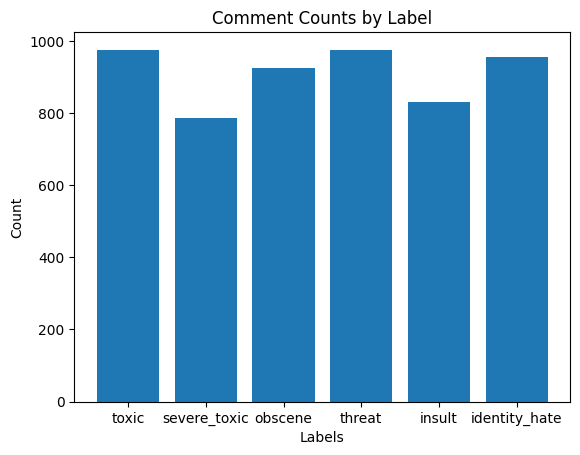

In [46]:
import matplotlib.pyplot as plt

# Calculate the count of comments for each label
label_counts = result_df[class_names].sum()

# Create a bar chart
plt.bar(class_names, label_counts)

# Set the title and labels for the chart
plt.title('Comment Counts by Label')
plt.xlabel('Labels')
plt.ylabel('Count')

# Show the chart
plt.show()


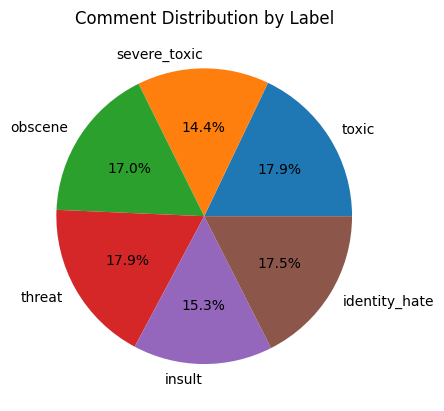

In [47]:
import matplotlib.pyplot as plt

# Calculate the count of comments for each label
label_counts = result_df[class_names].sum()

# Create a pie chart
plt.pie(label_counts, labels=class_names, autopct='%1.1f%%')

# Set the title for the chart
plt.title('Comment Distribution by Label')

# Show the chart
plt.show()
